In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
import os
from scipy import special
from scipy.optimize import minimize
from cycler import cycler
# custom_cycler = (cycler(color=plt.cm.tab10.colors))
print (cm.tab10.colors[0])
# plt.rcParams[]
def P_distribution(detections, lambda_P):
    return lambda_P ** detections * np.exp(-lambda_P) / (special.factorial(detections))

def number_conversion(detection_probability):
    lambdas = np.arange(0,30,0.0001)
    min_index = np.argmin(np.abs(P_distribution(0, lambdas) - (1-detection_probability)))
#     print (lambdas[min_index])
    return lambdas[min_index]

def exp_decay_offset(time, amp, tau, offset):
    return amp * np.exp(-time/tau) + offset

def exp_decay(time, amp, tau):
    return amp * np.exp(-time/tau)

loss = 3

def exp_rise(time, amp, tau):
    return amp * (1 - np.exp(-time/tau))

def exp_rise2(time, tau):
    return (1 - np.exp(-time/tau))

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)


In [6]:
a = np.logspace(0,3,10)
a = np.append(a,10000.0)
a = np.append(a,50000.0)
a

array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 1.00000000e+04, 5.00000000e+04])

[ 0.3 50. ]


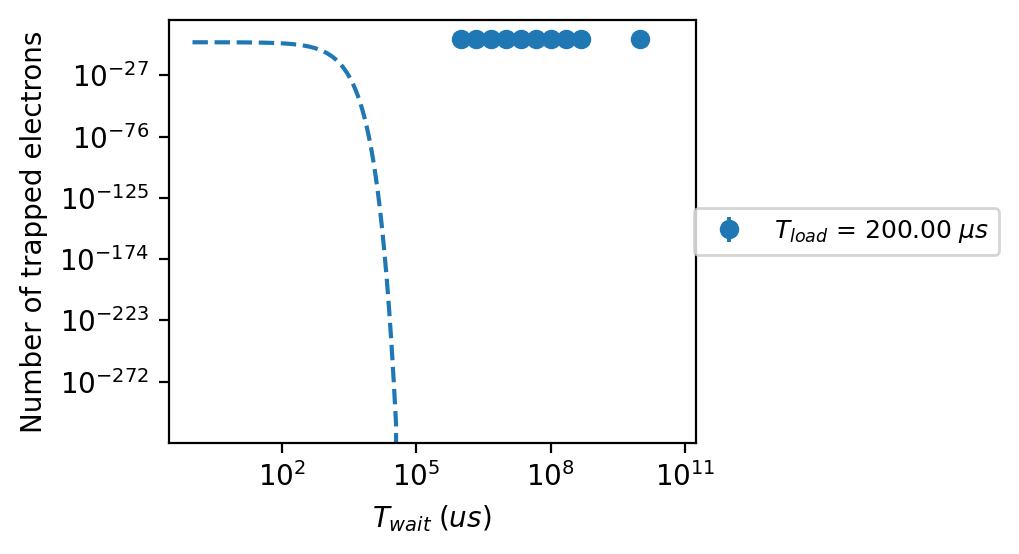

In [13]:
time_wait = np.logspace(0,3,10)
time_wait = np.append(time_wait,10000.0)
time_wait = np.append(time_wait,50000.0)
time_wait = time_wait/1E-6
counts = np.array([342,334,327,293,287,213,154,51,16,0,1,0])

fig, ax1 = plt.subplots(figsize = (3.4, 2.8), dpi = 200)
i = 0
reps = 1000
U2 = float(-0.5)
P_rf = float(0)
Tload = float(200)
label = '$T_{load}$ = ' + "{:.2f}".format(Tload) + '$\;\mu s$'
# data = np.genfromtxt(file, delimiter = ',')
# time_wait = data[:,0]/1E-6
time_cont = np.logspace(0, 5, 100)
# counts = data[:,1]/reps
counts_error = np.sqrt(counts)/reps

#     print (counts_error)
electron_number = [(number_conversion(counts[i])) * loss for i in range(len(counts))]
number_error = [(number_conversion(counts_error[i])) * loss for i in range(len(counts))]
number_error = np.array(number_error)
# popt, pcov = curve_fit(exp_decay_offset, time_wait[:], electron_number[:],sigma = number_error[:], absolute_sigma = True, p0 = [1, 10, 0.06], bounds = ([0,0,0.00],[500, 1000, 2]))
popt, pcov = curve_fit(exp_decay, time_wait[:], electron_number[:], p0 = [0.3, 50], bounds = ([0,0],[500, 1000]))
fit_errors = np.sqrt(np.diag(pcov))
print (popt)
ax1.errorbar(time_wait, electron_number, yerr = number_error, fmt = 'o', linewidth = 1.4, label = label)
ax1.set_yscale('log')
ax1.set_xscale('log')
#     plt.loglog(time_wait, electron_number, 'o', linewidth = 1.4, label = label)
plt.loglog(time_cont, exp_decay(time_cont, *popt),'--', color = cm.tab10.colors[i])
i = i + 1
ax1.set_xlabel('$T_{wait}\;(us)$')
ax1.set_ylabel('Number of trapped electrons')
#     ax2.set_ylabel('Av. number of electrons trapped')
plt.legend(fontsize = 9, loc='center right', bbox_to_anchor=(1.6, 0.5))
#     plt.savefig(file[:-4] + '_' + "{:n}".format(power422) + 'uW422_norm_electrons_paper' + '.png', bbox_inches = 'tight')
plt.show()